In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import functools
import operator
import random
from random import shuffle


class final_project():
    def __init__(self,gene,count_copy,count2,count3,count4,total_1,total_2,total_3,total_4, List_1,List_2,List_3,List_4, week1_1,week2_1,week3_1,week4_1, month_1,month_2,month_3,month_4, t_week_1,t_week_2,t_week_3,t_week_4, t_month_1,t_month_2,t_month_3,t_month_4,count,tls,total_tls,week_a,week_ac,week_as):
        
        df_week1 = pd.read_csv("week1.csv",encoding="big5")
        df_week2 = pd.read_csv("week2.csv",encoding="big5")
        df_week3 = pd.read_csv("week3.csv",encoding="big5")
        df_week4 = pd.read_csv("week4.csv",encoding="big5")
        week1 = df_week1.values.tolist()
        week2 = df_week2.values.tolist()
        week3 = df_week3.values.tolist()
        week4 = df_week4.values.tolist()
        
        #整合20為一群的資料
        self.total_1 = total_1
        self.total_2 = total_2
        self.total_3 = total_3
        self.total_4 = total_4
        #分20為一群的資料
        self.List_1 = List_1
        self.List_2 = List_2
        self.List_3 = List_3
        self.List_4 = List_4
        #分該週的週檢
        self.cweek1 = week1_1
        self.cweek2 = week2_1
        self.cweek3 = week3_1
        self.cweek4 = week4_1
        #分該週的月檢
        self.cmonth1 = month_1
        self.cmonth2 = month_2
        self.cmonth3 = month_3
        self.cmonth4 = month_4
        #整合第一週的週檢
        self.t_week_1 = t_week_1
        self.t_week_2 = t_week_2
        self.t_week_3 = t_week_3
        self.t_week_4 = t_week_4
        #整合第一週的月檢
        self.t_month_1 = t_month_1
        self.t_month_2 = t_month_2
        self.t_month_3 = t_month_3
        self.t_month_4 = t_month_4
        
        #累加一天已用的 TLS (num)
        self.tls=tls
        #整合一週的 self.tls (list)
        self.total_tls=total_tls
        #整合self.t_week_1與self.t_month_1
        self.count=count
        #整合self.t_week_i與self.t_month_i及前一週剩下的
        self.count2=count2
        self.count3=count3
        self.count4=count4
        #整合剩餘的紙管(list)
        self.week_a=week_a
        #剩餘的TLS數量
        self.week_as=week_as
        #剩餘多少種產品(count)
        self.week_ac=week_ac
        #一種排成
        self.gene=gene
        #
        self.count_copy=count_copy
        
        self.week1 = week1
        self.week2 = week2
        self.week3 = week3
        self.week4 = week4
        
        self.tbatch = []
        
    def classification(self, week, total, List):
        for gen in range(70, 80):
            low = gen
            for j in range(21):
                for i in range(len(week)):
                    if int(week[i][0] / 10000) == low:
                        List.append(week[i])
                low += 1
            total.append(List)
            List = []
            

    def classification_c2t(self, total, cweek, cmonth, t_week, t_month):
        for i in range(len(total)):
            for j in range(len(total[i])):
                cal = total[i][j][0] % 100
                if cal == 68 or cal == 42 or cal == 0:
                    cweek.append(total[i][j])
                else:
                    cmonth.append(total[i][j])
            
            t_week.append(cweek)
            t_month.append(cmonth)
            cweek = []
            cmonth = []
            
    def csv(self):
        df_week1 = pd.read_csv("week1.csv",encoding="big5")
        df_week2 = pd.read_csv("week2.csv",encoding="big5")
        df_week3 = pd.read_csv("week3.csv",encoding="big5")
        df_week4 = pd.read_csv("week4.csv",encoding="big5")
        
        week1=df_week1.values.tolist()
        week2=df_week2.values.tolist()
        week3=df_week3.values.tolist()
        week4=df_week4.values.tolist()
        return week1, week2, week3, week4

    def sort(self):
        for i in range(len(self.t_month_1)):
            np.random.shuffle(self.t_month_1[i])
        for i in range(len(self.t_month_2)):
            np.random.shuffle(self.t_month_2[i])
        for i in range(len(self.t_month_3)):
            np.random.shuffle(self.t_month_3[i])
        for i in range(len(self.t_month_4)):
            np.random.shuffle(self.t_month_4[i])
        for i in range(len(self.t_week_1)):
            np.random.shuffle(self.t_week_1[i])
        for i in range(len(self.t_week_2)):
            np.random.shuffle(self.t_week_2[i])
        for i in range(len(self.t_week_3)):
            np.random.shuffle(self.t_week_3[i])
        for i in range(len(self.t_week_4)):
            np.random.shuffle(self.t_week_4[i])
            
    
    def batch1(self,t_week_1,t_month_1):
        self.count.append(self.t_week_1)
        self.count.append(self.t_month_1)
#         self.gene.append([0])
#         print(self.count[1])
        for k in range(5):
            day = []
            for i in range (len(self.count)):
                for l in range(len(self.count[i])):
                    for j in range(len(self.count[i][l])):
                        self.tls=self.tls+self.count[i][l][j][1]

                        if self.tls<=672:
                            self.count_copy=self.count[i][l][j].copy()
                            e=l
                            while e <len(self.count[i])-1:
                                e=e+1
                                for m in range(len(self.count[i][e])):
                                    if self.count[i][l][j][2] == self.count[i][e][m][2]:
                                        self.count[i][e][m][0]=0
                                        self.count[i][e][m][1]=0
                                        self.count[i][e][m][2]=0
                                        self.count[i][e][m][3]=0

                            self.count[i][l][j][0]=0
                            self.count[i][l][j][1]=0
                            self.count[i][l][j][2]=0
                            self.count[i][l][j][3]=0
                            if self.count_copy[0]!=0:
                                day.append(self.count_copy)
                        if self.tls>672:
                            self.tls=self.tls-self.count[i][l][j][1]
            self.gene.append(day)
            self.total_tls.append(self.tls)
            self.tls=0
        
    def init2(self,count):
        for k in range(5):
            day = []
            for i in range (len(count)):
                for l in range(len(count[i])):
                        self.tls = self.tls + count[i][l][1]

                        if self.tls<=672:
                            self.count_copy = count[i][l].copy()
                            e=i
                            while e <len(count)-1:
                                e=e+1
                                for m in range(len(count[e])):
                                    if count[i][l][2] == count[e][m][2]:
                                        count[e][m][0]=0
                                        count[e][m][1]=0
                                        count[e][m][2]=0
                                        count[e][m][3]=0

                            count[i][l][0]=0
                            count[i][l][1]=0
                            count[i][l][2]=0
                            count[i][l][3]=0
                            if self.count_copy[0]!=0:
                                day.append(self.count_copy)
                        if self.tls>672:
                            self.tls=self.tls-count[i][l][1]
            self.gene.append(day)
            self.total_tls.append(self.tls)
            self.tls=0
            
    def batch2(self,t_week_, t_month_, count):
        self.total_tls=[]
        count.append(t_week_)
        count.append(t_month_)

        for k in range(5):
            for i in range (len(count)):
                for l in range(len(count[i])):
                    for j in range(len(count[i][l])):
                        self.tls = self.tls + count[i][l][j][1]
                        if self.tls <= 672:
                            e=l
                            
                            while e <len(count[i])-1:
                                e = e + 1
                                for m in range(len(count[i][e])):
                                    if count[i][l][j][2] == count[i][e][m][2]:
                                        count[i][e][m][0]=0
                                        count[i][e][m][1]=0
                                        count[i][e][m][2]=0
                                        count[i][e][m][3]=0
                            count[i][l][j][0]=0
                            count[i][l][j][1]=0
                            count[i][l][j][2]=0
                            count[i][l][j][3]=0
                        if self.tls>672:
                            self.tls = self.tls - count[i][l][j][1]
            self.total_tls.append(self.tls)
            self.tls=0
        self.tbatch.append(self.total_tls)
    
    def batch1234_result(self,count):
        self.week_a = []
        self.week_ac = 0
        self.week_as = 0
        for i in range(len(count)):
            for l in range(len(count[i])):
                for j in range(len(count[i][l])):
                    if count[i][l][j][3] != 0:                
                        self.week_a.append(count[i][l][j])
                        count[i][l][j][3] = 0
                        self.week_as = self.week_as + count[i][l][j][1]
            
        for k in range(len(self.week_a)):
            self.week_a[k][3] = 1  
#         print('---------------------------------')    
#         print('剩餘', self.week_a)
#         print('剩餘數', self.week_as)

#         self.week_ac = len(self.week_a)
#         print('---------------------------------')
#         print(self.week_ac)

    def week1_classification(self):
        self.classification(self.csv()[0], self.total_1, self.List_1)
        self.classification_c2t(self.total_1, self.cweek1, self.cmonth1, self.t_week_1, self.t_month_1)
        self.sort()
        self.batch1(self.t_month_1,self.t_week_1)
        self.batch1234_result(self.count)

    def week2_classification(self):
        self.classification(self.csv()[1], self.total_2, self.List_2)
        self.classification_c2t(self.total_2, self.cweek2, self.cmonth2, self.t_week_2, self.t_month_2)
        self.sort()
    def week3_classification(self):
        self.classification(self.csv()[2], self.total_3, self.List_3)
        self.classification_c2t(self.total_3, self.cweek3, self.cmonth3, self.t_week_3, self.t_month_3)
        self.sort()
    def week4_classification(self):
        self.classification(self.csv()[3], self.total_4, self.List_4)
        self.classification_c2t(self.total_4, self.cweek4, self.cmonth4, self.t_week_4, self.t_month_4)
        self.sort()
        
        
fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
fin.week1_classification()

# GA

In [19]:
import heapq
import copy

class GA():
    def __init__(self, parameters):
        self.ps = parameters[0]            # population size
        self.length = parameters[1]        # len_of_chromosone
        self.pc = parameters[2]            # crossover_rate
        self.pm = parameters[3]            # mutation_rate
        self.gene = []                     # 存放單個染色體(一組解)
        self.total_tls = []                # 存放單解的總和
        self.combine_gene = []
        self.combine_result = []
        self.sum_combine_result = []
        self.data = parameters[5]
        
        self.remainder_gen = []
        self.remainder_tls = 0
        self.remainder_sum_tls = []
        
        self.remain = []
        self.remain_tls = 0
        
        self.combine_remainder_gen = []           #剩餘的產品列
        self.combine_remainder_tls = []
        self.combine_remainder_sum_tls = []  
        self.fitness_max = []
        
        self.best_sum_tls_one = 0
        self.N_GENERATIONS = parameters[4]
        self.a = 2
        self.week = []
        self.month = []
        
        self.week1_pen = []
        self.week2_pen = []
        self.week3_pen = []
        self.week4_pen = []
        
    def init_sol(self):
        self.combine_gene = []
        self.combine_result = []
        self.sum_combine_result = []
        for i in range(self.ps):
            fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
            fin.week1_classification()

            self.combine_gene.append(fin.gene)
            self.combine_result.append(fin.total_tls)
            self.sum_combine_result.append(sum(fin.total_tls))
            self.combine_remainder_gen.append(fin.week_a)
            self.combine_remainder_sum_tls.append((fin.week_as))
        self.fitness_max.append(max(self.sum_combine_result))
#         print("initial total tls:",self.fitness_max)
#         print("initial schedule:",self.combine_gene[np.argmax(self.sum_combine_result)])
#         print("initial remains:",self.combine_remainder_gen[np.argmax(self.sum_combine_result)])
        
    def init_sol_2(self):
        self.combine_gene = []
        self.combine_result = []
        self.sum_combine_result = []
        for i in range(self.ps):
            new_week = []
            fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
            fin.week2_classification()
            new_week.extend(fin.t_month_2)
            new_week.extend(fin.t_week_2)
            new_week.append(self.month)

            fin.init2(new_week)
            
            self.combine_gene.append(fin.gene)
            self.combine_result.append(fin.total_tls)
            self.sum_combine_result.append(sum(fin.total_tls))
            self.combine_remainder_gen.append(fin.week_a)
            self.combine_remainder_sum_tls.append((fin.week_as))
            
        self.fitness_max.append(max(self.sum_combine_result))
#         print("initial total tls:",self.fitness_max)
#         print("initial schedule:",self.combine_gene[np.argmax(self.sum_combine_result)])
#         print("initial remains:",self.combine_remainder_gen[np.argmax(self.sum_combine_result)])
            
    def init_sol_3(self):
        self.combine_gene = []
        self.combine_result = []
        self.sum_combine_result = []
        for i in range(self.ps):
            new_week = []
            fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
            fin.week3_classification()
            new_week.extend(fin.t_month_3)
            new_week.extend(fin.t_week_3)
            new_week.append(self.month)
            fin.init2(new_week)

            self.combine_gene.append(fin.gene)
            self.combine_result.append(fin.total_tls)
            self.sum_combine_result.append(sum(fin.total_tls))
            self.combine_remainder_gen.append(fin.week_a)
            self.combine_remainder_sum_tls.append((fin.week_as))

        self.fitness_max.append(max(self.sum_combine_result))
#         print("initial total tls:",self.fitness_max)
#         print("initial schedule:",self.combine_gene[np.argmax(self.sum_combine_result)])
#         print("initial remains:",self.combine_remainder_gen[np.argmax(self.sum_combine_result)])
        
    def init_sol_4(self):
        self.combine_gene = []
        self.combine_result = []
        self.sum_combine_result = []
        for i in range(self.ps):
            new_week = []
            fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
            fin.week4_classification()
            new_week.extend(fin.t_month_4)
            new_week.extend(fin.t_week_4)
            new_week.append(self.month)
            fin.init2(new_week)

            self.combine_gene.append(fin.gene)
            self.combine_result.append(fin.total_tls)
            self.sum_combine_result.append(sum(fin.total_tls))
            self.combine_remainder_gen.append(fin.week_a)
            self.combine_remainder_sum_tls.append((fin.week_as))

        self.fitness_max.append(max(self.sum_combine_result))
#         print("initial total tls:",self.fitness_max)
#         print("initial schedule:",self.combine_gene[np.argmax(self.sum_combine_result)])
#         print("initial remains:",self.combine_remainder_gen[np.argmax(self.sum_combine_result)])
 
    def list2array(self):
        self.combine_result = np.array(self.combine_result)
        self.combine_gene = np.array(self.combine_gene)
        
    def select(self, sum_combine_result):
        best_sum = list(map(sum_combine_result.index, heapq.nlargest(2, sum_combine_result)))   # 選兩組最多TLS的解
        best_sum = np.array(best_sum)
        return best_sum
    
    def crossover(self):
        
        if np.random.rand() < self.pc:
            choice_day = []
            choice_day_result_list = []
            # 隨機選擇最好的兩天
            for i in range(2):
                rel = self.combine_result[self.select(self.sum_combine_result)]
                a = np.random.choice(np.arange(5), size = 2, replace = False, p = rel[i] / rel[i].sum())
                choice_day = self.combine_gene[self.select(self.sum_combine_result)][i][a].tolist()
                choice_day_result_list.append(choice_day)

            # 產生新的解
            self.combine_result = []
            self.sum_combine_result = []
            self.combine_gene = []

            self.combine_remainder_gen = []           #剩餘的產品列
            self.combine_remainder_tls = []
            self.combine_remainder_sum_tls = []
            for j in range(len(choice_day_result_list)):
                fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
                self.gene = []
                self.total_tls = []
                self.remainder_gen = []
                new_week = []
                self.remainder_tls = 0
                self.remainder_sum_tls = []
                tls = 0

                fin.classification(fin.csv()[0], fin.total_1, fin.List_1)
                fin.classification_c2t(fin.total_1, fin.cweek1, fin.cmonth1, fin.t_week_1, fin.t_month_1)
                fin.sort()
                new_week.extend(choice_day_result_list[j])
                new_week.extend(fin.t_month_1)
                new_week.extend(fin.t_week_1)
                for k in range(5):
                    day = []
                    for i in range (len(new_week)):  #22 個
                        for l in range(len(new_week[i])): #都不一樣
                            tls += new_week[i][l][1]
                            if tls <= 672:
                                new_week_copy = new_week[i][l].copy()
                                e = i
                                while e < len(new_week) - 1:
                                    e = e + 1
                                    for m in range(len(new_week[e])):
                                        if new_week[i][l][2] == new_week[e][m][2]:
                                            new_week[e][m][0] = 0
                                            new_week[e][m][1] = 0
                                            new_week[e][m][2] = 0
                                            new_week[e][m][3] = 0
                                new_week[i][l][0] = 0
                                new_week[i][l][1] = 0
                                new_week[i][l][2] = 0
                                new_week[i][l][3] = 0
                                if new_week_copy[0] != 0:
                                    day.append(new_week_copy)
                            if tls > 672:
                                tls = tls - new_week[i][l][1]
                    self.gene.append(day)
                    self.total_tls.append(tls)
                    tls = 0

                self.combine_gene.append(self.gene)
                self.combine_result.append(self.total_tls)    
                self.sum_combine_result.append(sum(self.total_tls))

                for i in range(len(new_week)):
                    for l in range(len(new_week[i])):
                        if new_week[i][l][3] != 0:                
                            self.remainder_gen.append(new_week[i][l])
                            new_week[i][l][3] = 0
                            self.remainder_tls = self.remainder_tls + new_week[i][l][1]

                self.combine_remainder_gen.append(self.remainder_gen)
                self.remainder_sum_tls.append(self.remainder_tls)
                self.combine_remainder_sum_tls.append(sum(self.remainder_sum_tls))

                for k in range(len(self.remainder_gen)):
                    self.remainder_gen[k][3] = 1  

            for i in range(self.ps - 2):

                fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
                fin.week1_classification()

                self.combine_gene.append(fin.gene)
                self.combine_result.append(fin.total_tls)
                self.sum_combine_result.append(sum(fin.total_tls))

                self.combine_remainder_gen.append(fin.week_a)
                self.combine_remainder_sum_tls.append((fin.week_as))
    
    def crossover234(self):
        if np.random.rand() < self.pc:
        
            choice_day = []
            choice_day_result_list = []
            # 隨機選擇最好的兩天
            for i in range(2):
                rel = self.combine_result[self.select(self.sum_combine_result)]
                a = np.random.choice(np.arange(5), size = 2, replace = False, p = rel[i] / rel[i].sum())
                choice_day = self.combine_gene[self.select(self.sum_combine_result)][i][a].tolist()
                choice_day_result_list.append(choice_day)

    #         print("遺傳基因(長度)：", len(choice_day_result_list))
    #         print("遺傳的基因：", choice_day_result_list)
    #         print("--------------------------------------------------------")
            
            # 產生新的解
            self.combine_result = []
            self.sum_combine_result = []
            self.combine_gene = []

            self.combine_remainder_gen = []           #剩餘的產品列
            self.combine_remainder_tls = []
            self.combine_remainder_sum_tls = []
            for j in range(len(choice_day_result_list)):
                fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
                self.gene = []
                self.total_tls = []
                self.remainder_gen = []
                new_week = []
                self.remainder_tls = 0
                self.remainder_sum_tls = []
                tls = 0

                if self.a == 2:
                    fin.week2_classification()
                    new_week.extend(choice_day_result_list[j])
                    new_week.extend(fin.t_month_2)
                    new_week.extend(fin.t_week_2)
                elif self.a == 3:
                    fin.week3_classification()
                    new_week.extend(choice_day_result_list[j])
                    new_week.extend(fin.t_month_3)
                    new_week.extend(fin.t_week_3)
                else:
                    fin.week4_classification()
                    new_week.extend(choice_day_result_list[j])
                    new_week.extend(fin.t_month_4)
                    new_week.extend(fin.t_week_4)
            
                new_week.append(self.month)
    
                for k in range(5):
                    day = []
                    for i in range (len(new_week)):  #22 個
                        for l in range(len(new_week[i])): #都不一樣
                            tls += new_week[i][l][1]
                            if tls <= 672:
                                new_week_copy = new_week[i][l].copy()
                                e = i
                                while e < len(new_week) - 1:
                                    e = e + 1
                                    for m in range(len(new_week[e])):
#                                         print(new_week[0][0][2],new_week[0][0][2])
                                        if new_week[i][l][2] == new_week[e][m][2]:
                                            new_week[e][m][0] = 0
                                            new_week[e][m][1] = 0
                                            new_week[e][m][2] = 0
                                            new_week[e][m][3] = 0
                                new_week[i][l][0] = 0
                                new_week[i][l][1] = 0
                                new_week[i][l][2] = 0
                                new_week[i][l][3] = 0
                                if new_week_copy[0] != 0:
                                    day.append(new_week_copy)
                            if tls > 672:
                                tls = tls - new_week[i][l][1]
                    self.gene.append(day)
                    self.total_tls.append(tls)
                    tls = 0

                self.combine_gene.append(self.gene)
                self.combine_result.append(self.total_tls)    
                self.sum_combine_result.append(sum(self.total_tls))

                for i in range(len(new_week)):
                    for l in range(len(new_week[i])):
                        if new_week[i][l][3] != 0:                
                            self.remainder_gen.append(new_week[i][l])
                            new_week[i][l][3] = 0
                            self.remainder_tls = self.remainder_tls + new_week[i][l][1]

                self.combine_remainder_gen.append(self.remainder_gen)
                self.remainder_sum_tls.append(self.remainder_tls)
                self.combine_remainder_sum_tls.append(sum(self.remainder_sum_tls))

                for k in range(len(self.remainder_gen)):
                    self.remainder_gen[k][3] = 1  

            for i in range(self.ps - 2):

                fin = final_project([], np.zeros(4),[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],0,[],[],0,0)
                if self.a == 2:
                    fin.week2_classification()
                    fin.batch2(fin.t_month_2, fin.t_week_2, fin.count2)
                    fin.batch1234_result(fin.count2)
                
                elif self.a == 3:
                    fin.week3_classification()
                    fin.batch2(fin.t_month_3, fin.t_week_3, fin.count3)
                    fin.batch1234_result(fin.count3)
                    
                else:
                    fin.week4_classification()
                    fin.batch2(fin.t_month_4, fin.t_week_4, fin.count4)
                    fin.batch1234_result(fin.count4)
                    
                self.combine_gene.append(fin.gene)
                self.combine_result.append(fin.total_tls)
                self.sum_combine_result.append(sum(fin.total_tls))

                self.combine_remainder_gen.append(fin.week_a)
                self.combine_remainder_sum_tls.append((fin.week_as))
#         print("-----------------新的排程：-------------------", "\n", self.combine_gene)
#         print("----------------新的TLS大小：-----------------", "\n", self.combine_result)
#         print("----------------各個TLS加總：-----------------", "\n", self.sum_combine_result)
        
    def mutate(self, child, idx):
        if np.random.rand() < self.pm:
            if len(self.combine_remainder_gen) != 0:
                swap_point = np.random.randint(0, self.length)
                swap_point_remainder = np.random.randint(0, len(self.combine_remainder_gen[idx]))

                cal = child[swap_point][0] % 100
                if cal == 68 or cal == 42 or cal == 0:
                    swap_point = np.random.randint(0, self.length)
                swapA, swapB = child[swap_point], self.combine_remainder_gen[idx][swap_point_remainder]
                child[swap_point], self.combine_remainder_gen[idx][swap_point_remainder] = swapB, swapA
                ttllss = 0

                for t in range(len(child)):
                    ttllss += child[t][1]
                if ttllss > 672:
                    child[swap_point], self.combine_remainder_gen[idx][swap_point_remainder] = swapA, swapB
        
        return child
    
    def fitness(self):

        self.sum_combine_result = []
        self.combine_result = []
        for i in range(len(self.combine_gene)):   # 5種解
            a = []
            for j in range(len(self.combine_gene[i])):   # 5天
                tls = 0
                for l in range(len(self.combine_gene[i][j])):   #每天當中放了多少個count
                    tls +=  self.combine_gene[i][j][l][1]
                a.append(tls)
            self.combine_result.append(a)
            self.sum_combine_result.append(sum(a))

        max_tls = list(heapq.nlargest(1, self.sum_combine_result))
        max_ = list(map((self.sum_combine_result).index, heapq.nlargest(1, self.sum_combine_result)))
        best_gene = self.combine_gene[max_[0]]
        return max_, max_tls, best_gene
    
    def remains(self):
        if len(self.remain) != 0:
            if len(self.remain) == 1:
                self.week = []
                self.month = []
                for i in range(len(self.remain)):
                    cal = self.remain[0][i][0] % 100
                    if cal == 68 or cal == 42 or cal == 0:
                        self.week.append(self.remain[0][i])
                    else:
                        self.month.append(self.remain[0][i])
            else:
                self.week = []
                self.month = []
                for i in range(len(self.remain)):
                    cal = self.remain[i][0] % 100
                    if cal == 68 or cal == 42 or cal == 0:
                        self.week.append(self.remain[i])
                    else:
                        self.month.append(self.remain[i])
    
    def penalty(self):
        penw = len(self.week) * 2
        penm = len(self.month) 
        return penw , penm
    
    def plot(self):
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterations", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.N_GENERATIONS * 4)]
        plt.plot(t, self.week1_pen, color = 'b', linewidth = 2)
        plt.show()
        
    def main(self):
        old = 0
        final = []
        b = 0
        c = 0
        for i in range(self.N_GENERATIONS):
            self.init_sol()
            old = max(self.sum_combine_result)
            self.list2array()
            self.select(self.sum_combine_result)
            self.crossover()
            self.remain = []
            for idx in range(len(self.combine_gene)):
                for child in (self.combine_gene[idx]):
                    self.mutate(child, idx)
                fitness = self.fitness()
            if old < fitness[1][0]:
                old = fitness[1][0]
                final = copy.deepcopy(fitness[2])
                self.remain.extend(self.combine_remainder_gen[fitness[0][0]])
               # a = self.remain
                self.remains()
                b = self.penalty()[0]
                self.week1_pen.append(b)
              #  e = self.penalty()[1]
            else:
                self.remain.extend(self.combine_remainder_gen[fitness[0][0]])
                self.remains()
                e = self.penalty()[0]
                self.week1_pen.append(e)
            self.fitness_max.extend(fitness[1])    
        print("self.week1_pen",self.week1_pen)

        print("*******************************","week 1","*******************************")
        print("best total tls:", old,"\n","final schedule:", "\n", final, "\n", "week remain:", "\n", self.week , "\n", "week penalty:", b)
        c += b
        
       # print("all pen:", self.week1_pen)
                       
        for d in range(1,self.data):
            old = 0
            final = []
            for i in range(self.N_GENERATIONS):
                self.remain = []
                if d == 2:
                    self.init_sol_2()
                    self.list2array()
                    self.select(self.sum_combine_result)
                    self.crossover234()
#                     print("Week 2")
                elif d == 3:
                    self.init_sol_3()
                    self.list2array()
                    self.select(self.sum_combine_result)
                    self.crossover234()
#                     print("Week 3")
                else:
                    self.init_sol_4()
                    self.list2array()
                    self.select(self.sum_combine_result)
                    self.crossover234()
#                     print("Week 4")
                for idx in range(len(self.combine_gene)):
                    for child in (self.combine_gene[idx]):
                        self.mutate(child, idx)
                    fitness = self.fitness()

                if old < fitness[1][0]:
                    old = fitness[1][0]
                    final = fitness[2]
                    self.remain.extend(self.combine_remainder_gen[fitness[0][0]])
                  #  a = self.remain
                    self.remains()
                    e = self.penalty()[0]
                    self.week1_pen.append(e)
                   # e = self.penalty()[1]
                else:
                    self.remain.extend(self.combine_remainder_gen[fitness[0][0]])
                    self.remains()
                    b = self.penalty()[0]
                    self.week1_pen.append(b)
                self.fitness_max.extend(fitness[1])
               # print("all pen:", self.week1_pen)
            print("*******************************","week",d + 1,"*******************************")
            print("best total tls:", old,"\n","final schedule:", "\n", final, "\n", "week remain:", "\n", self.week, "\n", "week penalty:", b)
            c += b
            self.a = d
            if d == 4:
                print("month remain:", self.month, "\n", "month penalty:", c + len(self.month))
        self.plot()

self.week1_pen [0, 0, 10, 18, 12]
******************************* week 1 *******************************
best total tls: 3322 
 final schedule: 
 [[[711300, 101, 183, 1], [786800, 133, 144, 1], [716300, 102, 162, 1], [886342, 68, 152, 1], [711300, 99, 175, 1], [713200, 118, 181, 1], [716868, 37, 185, 1]], [[711368, 96, 174, 1], [711368, 71, 176, 1], [906290, 83, 150, 1], [716391, 109, 164, 1], [716290, 60, 159, 1], [860290, 86, 145, 1], [756891, 130, 143, 1], [913290, 34, 151, 1]], [[886290, 24, 148, 1], [716290, 69, 160, 1], [716290, 51, 153, 1], [716290, 45, 178, 1], [716290, 128, 167, 1], [716290, 63, 172, 1], [716290, 114, 157, 1], [716391, 80, 165, 1], [903290, 50, 149, 1], [706290, 40, 163, 1]], [[866290, 149, 147, 1], [713290, 117, 177, 1], [716290, 148, 169, 1], [726290, 61, 142, 1], [716290, 133, 161, 1], [716290, 58, 180, 1]], [[863290, 71, 146, 1], [716391, 53, 171, 1], [716290, 102, 155, 1], [716391, 77, 156, 1], [713290, 132, 179, 1], [716290, 134, 168, 1], [716391, 70, 17

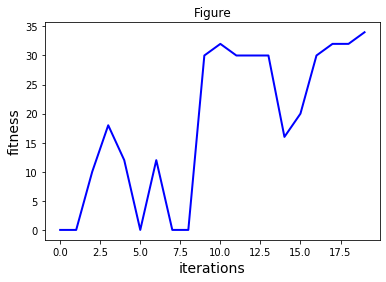

In [20]:
if __name__ == '__main__':
    population_size = 5        
    len_of_chromosone = 5
    crossover_rate = 0.5
    mutation_rate = 0.01
    N_GENERATIONS = 5
    N_DATA = 4
    parameters = [population_size, len_of_chromosone, crossover_rate, mutation_rate, N_GENERATIONS, N_DATA]
    ga = GA(parameters)
    ga.main()